In [202]:
import pandas
import mba263
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
pandas.options.mode.chained_assignment = None

In [2]:
data_original=pandas.read_csv('intuit.csv')

In [3]:
data_original

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,0
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,M,0,99824,20,4,58.0,8,19,0,0,1,0
19996,19997,M,0,99835,20,1,22.0,17,2,0,0,0,0
19997,19998,M,0,99835,20,1,29.5,12,14,0,0,0,0
19998,19999,M,0,99901,20,2,111.5,19,22,0,0,1,0


Create dummy variables

In [4]:
sex=pandas.get_dummies(data_original['sex'], drop_first=True, prefix='sex')
data_with_dummies=pandas.concat([data_original,sex],axis=1)

In [5]:
zip_bins=pandas.get_dummies(data_original['zip_bins'], drop_first=True, prefix='zip_bins')

In [6]:
data_with_dummies=pandas.concat([data_with_dummies,zip_bins],axis=1)

In [7]:
data_with_dummies

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_11,zip_bins_12,zip_bins_13,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20
0,1,U,1,99999,20,1,129.5,11,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,U,1,99999,20,2,65.0,4,14,0,...,0,0,0,0,0,0,0,0,0,1
2,3,U,1,99999,20,1,24.5,13,36,1,...,0,0,0,0,0,0,0,0,0,1
3,4,U,1,99999,20,1,80.5,5,19,1,...,0,0,0,0,0,0,0,0,0,1
4,5,U,1,99999,20,1,111.0,14,7,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,M,0,99824,20,4,58.0,8,19,0,...,0,0,0,0,0,0,0,0,0,1
19996,19997,M,0,99835,20,1,22.0,17,2,0,...,0,0,0,0,0,0,0,0,0,1
19997,19998,M,0,99835,20,1,29.5,12,14,0,...,0,0,0,0,0,0,0,0,0,1
19998,19999,M,0,99901,20,2,111.5,19,22,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data_with_dummies.to_csv('data_with_dummies.csv')

In [9]:
varlist=['bizflag','numords','dollars','last','sincepurch','version1','owntaxprod','upgraded','sex_F','sex_M','sex_U',
         'zip_bins_2','zip_bins_3','zip_bins_4','zip_bins_5','zip_bins_6','zip_bins_7','zip_bins_8',
        'zip_bins_9','zip_bins_10','zip_bins_11','zip_bins_12','zip_bins_13','zip_bins_14',
        'zip_bins_15','zip_bins_16','zip_bins_17','zip_bins_18','zip_bins_19','zip_bins_20']

In [ ]:
####### Split data into training set and test set #######

In [212]:
y_dummy = data_with_dummies['res1'].to_frame()
X_dummy = data_with_dummies[varlist]
y_dummy

,res1
0,0
1,0
2,0
3,0
4,0
...,...
19995,0
19996,0
19997,0
19998,0


In [264]:
n_fold = 3
kf = KFold(n_splits=n_fold, random_state=1, shuffle=True)
kf.get_n_splits(X_dummy)



3

,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,sex_F,sex_M,...,zip_bins_11,zip_bins_12,zip_bins_13,zip_bins_14,zip_bins_15,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20
0,1,1,129.5,11,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,65.0,4,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,24.5,13,36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,80.5,5,19,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,111.0,14,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,1,24.5,17,25,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
19995,0,4,58.0,8,19,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
19996,0,1,22.0,17,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19997,0,1,29.5,12,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [265]:
i = 1

for train_index, test_index in kf.split(X_dummy):

    globals()['X_train_' + str(i)]=X_dummy.loc[train_index]
    globals()['X_test_' + str(i)]=X_dummy.loc[test_index]
    globals()['y_train_' + str(i)]=y_dummy.loc[train_index]
    globals()['y_test_' + str(i)]=y_dummy.loc[test_index]
    i=i+1
    
y_test_1

,res1
0,0
4,0
5,0
6,0
7,0
...,...
19991,0
19992,0
19993,0
19994,0


Logistic Regression with no interactions

In [ ]:
##### Train Models ######

In [ ]:
## Logistic Regression

In [270]:
for i in range(1,n_fold+1):
    globals()['model_logit_' + str(i)] = mba263.logit(globals()['y_train_' + str(i)]['res1'],\
                                                      globals()['X_train_' + str(i)])
    
    print('Completed %s iteration of fold modeling' % i)


Optimization terminated successfully.
         Current function value: 0.168259
         Iterations 8
Completed 1 iteration of fold modeling
Optimization terminated successfully.
         Current function value: 0.167056
         Iterations 8
Completed 2 iteration of fold modeling
Optimization terminated successfully.
         Current function value: 0.174026
         Iterations 8
Completed 3 iteration of fold modeling


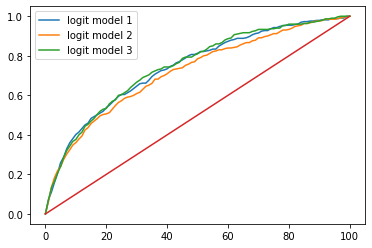

In [271]:
for i in range(1,n_fold+1):
    globals()['gain_logit_' + str(i)]\
    =mba263.gain(globals()['y_test_' + str(i)]['res1'],\
                 globals()['model_logit_' + str(i)].predict(globals()['X_test_' + str(i)]),\
                 bins =100)
    
    plt.plot(globals()['gain_logit_' + str(i)],label='logit model %s' % i)
    
plt.plot([0,100],[0,1])
plt.legend()



In [ ]:

#### Neural Network Modeling 


In [275]:
for i in range(1,n_fold+1):
    globals()['model_nn_' + str(i)] = mba263.neural_network(globals()['y_train_' + str(i)]['res1'],\
                                                      globals()['X_train_' + str(i)])
    
    print('Completed %s iteration of fold modeling' % i)

Completed 1 iteration of fold modeling
Completed 2 iteration of fold modeling
Completed 3 iteration of fold modeling


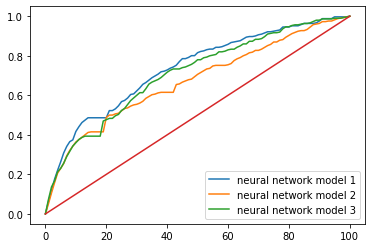

In [279]:
for i in range(1,n_fold+1):
    globals()['Result_test_' + str(i)] = globals()['y_test_' + str(i)]
    
    globals()['Result_test_' + str(i)]['p_nn'] =\
    globals()['model_nn_' + str(i)].predict(globals()['X_test_' + str(i)])
    
    globals()['gain_nn_' + str(i)]\
    =mba263.gain(globals()['y_test_' + str(i)]['res1'],\
                 globals()['Result_test_' + str(i)]['p_nn'],\
                 bins =100)
    
    plt.plot(globals()['gain_nn_' + str(i)],label='neural network model %s' % i)
    
plt.plot([0,100],[0,1])
plt.legend()


In [ ]:
# NN Model 1 has the best performance

In [ ]:
#### Random Forest Model. #####

In [280]:
for i in range(1,n_fold+1):
    globals()['model_rf1_' + str(i)] = mba263.random_forest(globals()['y_train_' + str(i)]['res1'],\
                                                            globals()['X_train_' + str(i)],\
                                                            trees=500,leaf_nodes=200)
    
    print('Completed %s iteration of fold modeling' % i)

Completed 1 iteration of fold modeling
Completed 2 iteration of fold modeling
Completed 3 iteration of fold modeling


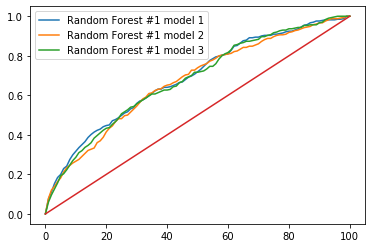

In [283]:
for i in range(1,n_fold+1):
    
    
    globals()['Result_test_' + str(i)]['p_rf1'] =\
    globals()['model_rf1_' + str(i)].predict(globals()['X_test_' + str(i)])
    
    globals()['gain_rf1_' + str(i)]\
    =mba263.gain(globals()['y_test_' + str(i)]['res1'],\
                 globals()['Result_test_' + str(i)]['p_rf1'],\
                 bins =100)
    
    plt.plot(globals()['gain_rf1_' + str(i)],label='Random Forest #1 model %s' % i)
    
plt.plot([0,100],[0,1])
plt.legend()

In [284]:
# No obvious difference. Choose model 2.

In [ ]:
### Compare models

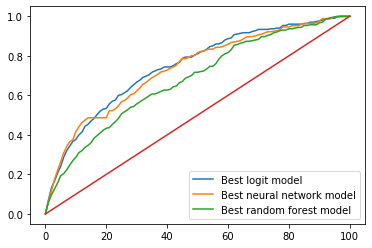

In [285]:
plt.plot(gain_logit_3,label='Best logit model')
plt.plot(gain_nn_1,label='Best neural network model')
plt.plot(gain_rf1_3,label='Best random forest model')
plt.plot([0,100],[0,1])
plt.legend()

In [ ]:
####### Choose mailing list for wave 2. ######

In [ ]:
# Predict using the final model

In [286]:
p_final = model_logit_3.predict(data_with_dummies[varlist])
data_with_dummies['p_final']=p_final

In [ ]:
# Sort out customers who didn't response in wave 1

In [287]:
data_responsed=data_with_dummies[data_with_dummies['res1']==1]
data_non_response=data_with_dummies[data_with_dummies['res1']==0]

In [14]:
# Assuming 50% dropout rate, choose customers based on break-even p-value 2.35%

In [288]:
data_mail_wave2=data_non_response[data_non_response['p_lr']>(0.0235*2)]
data_mail_wave2

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,...,zip_bins_16,zip_bins_17,zip_bins_18,zip_bins_19,zip_bins_20,p_lr,p_nn,p_rf,p_rf2,p_final
3,4,U,1,99999,20,1,80.5,5,19,1,...,0,0,0,0,1,0.055707,0.055831,0.042054,0.052317,0.059230
6,7,U,1,99999,20,1,56.0,5,27,0,...,0,0,0,0,1,0.065517,0.163260,0.054020,0.065333,0.069537
14,15,U,1,99999,20,3,80.5,19,21,0,...,0,0,0,0,1,0.048520,0.043705,0.029859,0.040947,0.050308
15,16,U,1,99999,20,3,46.0,4,35,1,...,0,0,0,0,1,0.091973,0.051195,0.043664,0.055691,0.101632
17,18,U,1,99999,20,3,62.0,2,22,0,...,0,0,0,0,1,0.113443,0.135521,0.070691,0.073273,0.115488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19979,19980,M,0,99707,20,3,139.0,2,13,0,...,0,0,0,0,1,0.057117,0.056894,0.039687,0.047602,0.059241
19982,19983,M,0,99709,20,4,53.5,2,22,0,...,0,0,0,0,1,0.139620,0.145943,0.082702,0.108887,0.141447
19984,19985,U,1,99712,20,2,42.0,11,30,0,...,0,0,0,0,1,0.059896,0.073839,0.050474,0.056610,0.063825
19989,19990,U,1,99801,20,5,162.5,19,30,1,...,0,0,0,0,1,0.071798,0.032043,0.041955,0.052860,0.079997


In [ ]:
## Need to send 5622 mails in wave 2 with 3-fold

In [ ]:
## Output maillist

In [289]:
data_mail_wave2.to_csv('Mail_list_wave_2_3foldstudy.csv')